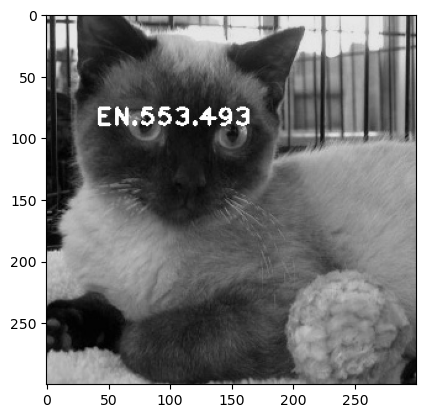

In [1]:
from estimate_watermark import *
from preprocess import *
from image_crawler import *
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/Users/xinmingshen_1/Desktop/test 2/cat.1.jpg')
plt.imshow(img)
plt.show()

Location at: 
(70, 38)
(23, 130)

In [2]:
ls

NewTrial.ipynb             image_crawler.py
__init__.py                preprocess.py
__pycache__/               tensorflow_experiments.py
closed_form_matting.py     watermark_reconstruct.py
estimate_watermark.py


This script contains a LOT of print statements for debugging, sorry!

In [3]:
from estimate_watermark import * # Reload to check updates of script

gx, gy, gxlist, gylist = estimate_watermark('/Users/xinmingshen_1/Desktop/test 2')
print("Gradients computed.")

Computing gradients.
Number of images processed: 51
Computing median gradients.
Gradients computed.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


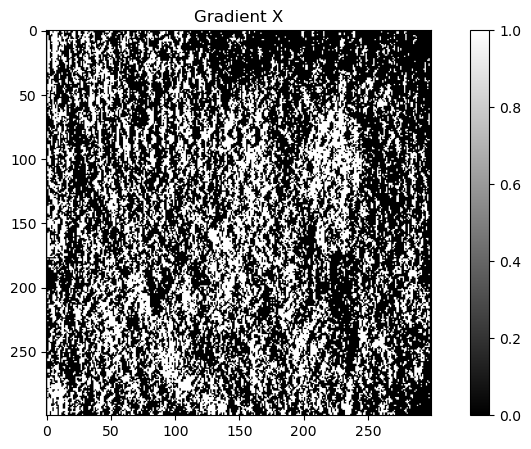

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


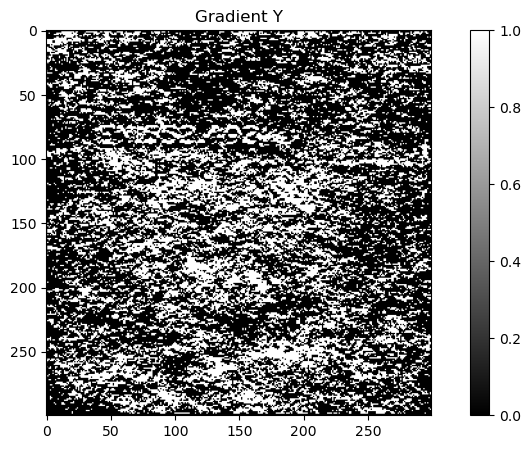

In [4]:
def plot_gradient(grad, title="Gradient"):
    if grad is not None:
        plt.figure(figsize=(10, 5))
        plt.imshow(grad, cmap='gray')
        plt.colorbar()
        plt.title(title)
        plt.show()
    else:
        print("Gradient data is None, cannot plot.")

plot_gradient(gx, "Gradient X")
plot_gradient(gy, "Gradient Y")

In [5]:
def plot_image(image, title):
    if image is not None:
        plt.figure(figsize=(6, 6))
        # Normalize image for better visualization if it's not already normalized
        image = (image - np.min(image)) / (np.max(image) - np.min(image))
        plt.imshow(image, cmap='gray')  # Use cmap='jet' for color maps if needed
        plt.title(title)
        plt.colorbar()
        plt.show()
    else:
        print("No image data to plot.")


In [6]:
est, loss = poisson_reconstruct(gx, gy)
cropped_gx, cropped_gy = crop_watermark(gx, gy)
est2, _ = poisson_reconstruct(cropped_gx, cropped_gy)

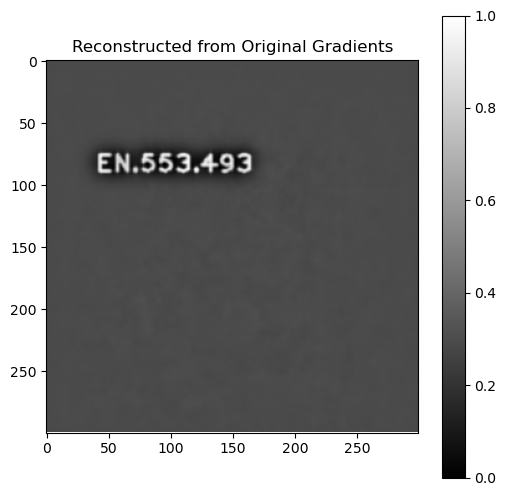

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


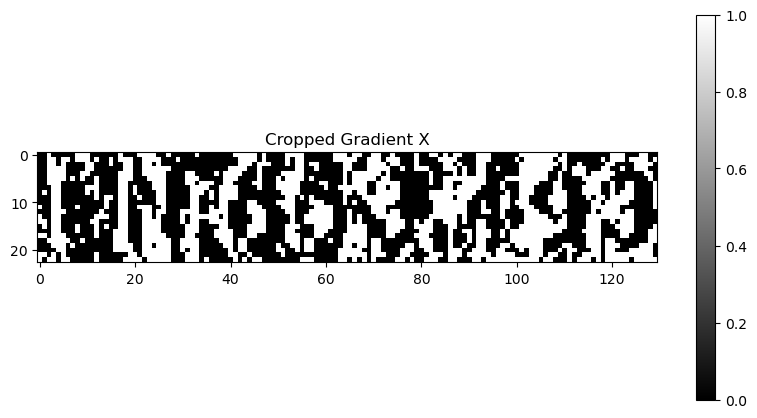

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


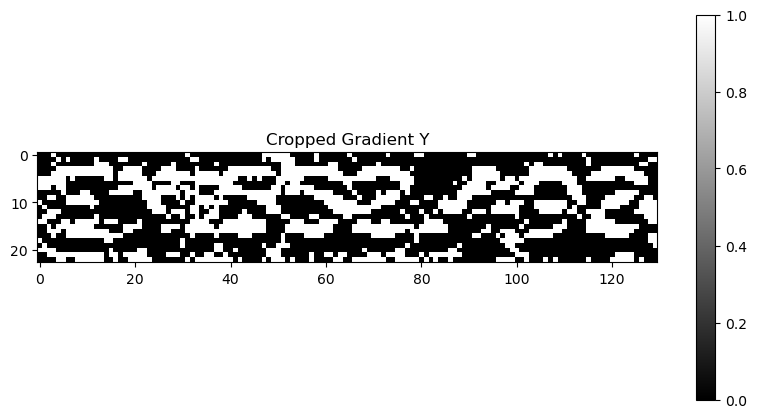

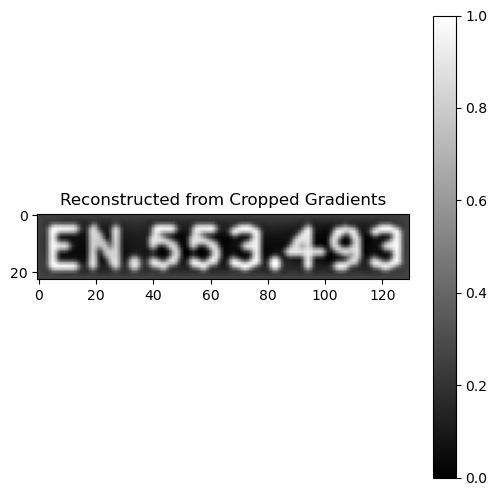

In [7]:
plot_image(est, "Reconstructed from Original Gradients")
# image reconstructed from the original gradients gx and gy
plot_gradient(cropped_gx, "Cropped Gradient X")
plot_gradient(cropped_gy, "Cropped Gradient Y")

plot_image(est2, "Reconstructed from Cropped Gradients")
# reconstructed from cropped_gx and cropped_gy, which are the gradients obtained after cropping the original gradients

In [8]:
img = cv2.imread('/Users/xinmingshen_1/Desktop/test 2/cat.1.jpg')
im, start, end = watermark_detector(img, cropped_gx, cropped_gy)

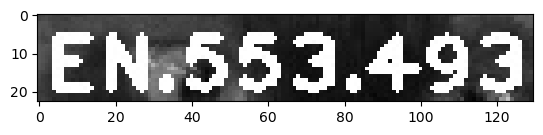

In [9]:
plt.imshow(img[start[0]:(start[0]+end[0]), start[1]:(start[1]+end[1]), :])

In [10]:
print(start)
print(end)

(70, 38)
(23, 130)


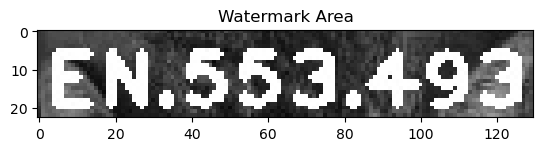

In [41]:
img_path = '/Users/xinmingshen_1/Desktop/test 2/cat.2.jpg'
img = cv2.imread(img_path)

_, start, end = watermark_detector(img, cropped_gx, cropped_gy)
watermark = img[start[0]:start[0]+end[0], start[1]:start[1]+end[1], :]

plt.imshow(cv2.cvtColor(watermark, cv2.COLOR_BGR2RGB))
plt.title('Watermark Area')
plt.show()

In [42]:
print(start)
print(end)

(70, 38)
(23, 130)


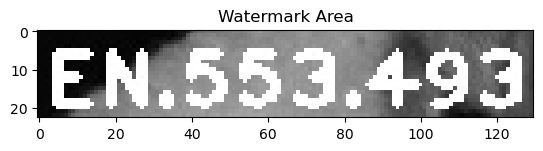

In [43]:
img_path = '/Users/xinmingshen_1/Desktop/test 2/cat.3.jpg'
img = cv2.imread(img_path)

_, start, end = watermark_detector(img, cropped_gx, cropped_gy)
watermark = img[start[0]:start[0]+end[0], start[1]:start[1]+end[1], :]

plt.imshow(cv2.cvtColor(watermark, cv2.COLOR_BGR2RGB))
plt.title('Watermark Area')
plt.show()

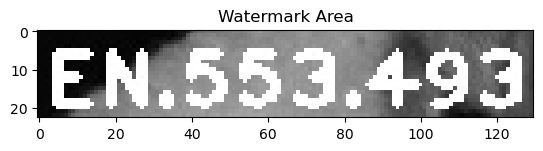

In [44]:
watermark_save_path = '/Users/xinmingshen_1/Desktop/Watermark/cropped_watermark.jpg'

cv2.imwrite(watermark_save_path, watermark)
plt.imshow(cv2.cvtColor(watermark, cv2.COLOR_BGR2RGB))
plt.title('Watermark Area')
plt.show()

In [45]:
print(end) # relative to start
print(start)

(23, 130)
(70, 38)


In [46]:
start_ir = (start[0], start[1]) 
end_ir = (end[0] + start[1], end[1] + start[0])  # Update with actual values

# start should be (38, 70)
# end shoule be (38 + 130, 23 + 70)

print(start_ir)
print(end_ir) # irrelative to start

(70, 38)
(61, 200)


## Testing for watermark removal at targeted area 
- use inpaint method from cv2 for testing only

In [47]:
img_path = '/Users/xinmingshen_1/Desktop/test 2/cat.2.jpg'
img = cv2.imread(img_path)

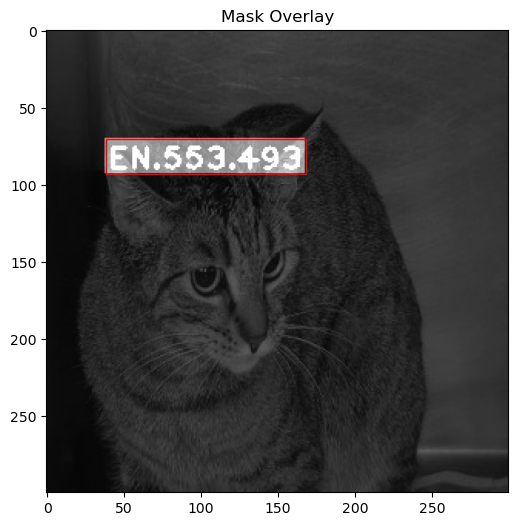

In [59]:
img_path = '/Users/xinmingshen_1/Desktop/test 2/cat.2.jpg'
img = cv2.imread(img_path)

mask = np.zeros(img.shape[:2], dtype=np.uint8)
mask[start_ir[1]:end_ir[1], start_ir[0]:end_ir[0]] = 255

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img_rgb)


ax.imshow(mask, cmap='gray', alpha=0.5) # transparent

rect = patches.Rectangle((start_ir[0], start_ir[1]), end_ir[0] - start_ir[0], end_ir[1] - start_ir[1], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

ax.set_title('Mask Overlay')

plt.show()

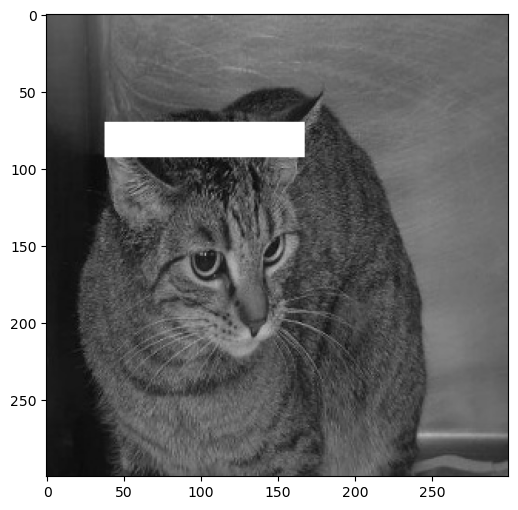

In [68]:
img[start_ir[1]:end_ir[1], start_ir[0]:end_ir[0]] = [255, 255, 255] # Modify it to white
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img_rgb)

In [69]:
save_path = '/Users/xinmingshen_1/Desktop/Watermark/modified_image_test.jpg'
cv2.imwrite(save_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

True

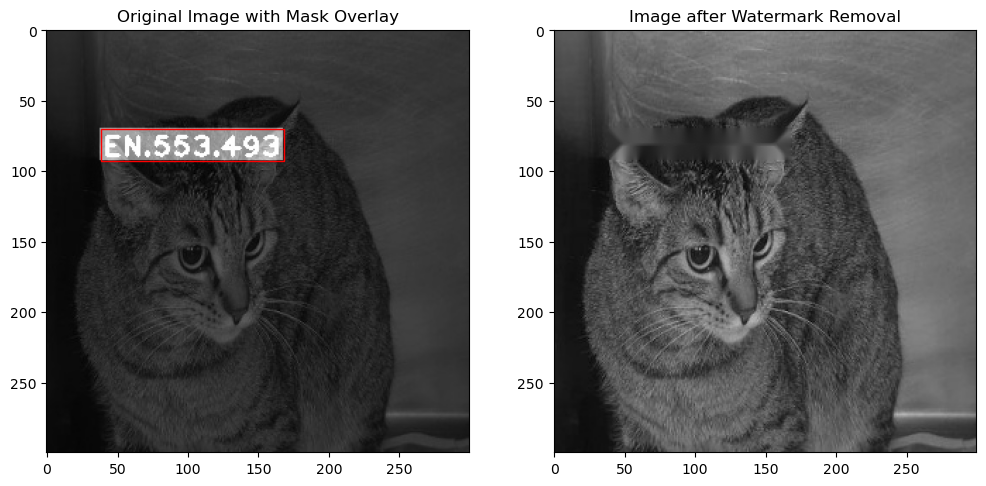

In [67]:
inpaint_technique = cv2.INPAINT_TELEA  # or use cv2.INPAINT_NS
inpainted_image = cv2.inpaint(img, mask, 3, inpaint_technique)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
inpainted_image_rgb = cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(img_rgb)
axs[0].imshow(mask, cmap='gray', alpha=0.5)
rect = patches.Rectangle((start_ir[0], start_ir[1]), end_ir[0] - start_ir[0], end_ir[1] - start_ir[1], linewidth=1, edgecolor='r', facecolor='none')
axs[0].add_patch(rect)
axs[0].set_title('Mask Overlay')

# Inpainted image
axs[1].imshow(inpainted_image_rgb)
axs[1].set_title('Image after Watermark Removal')

plt.show()

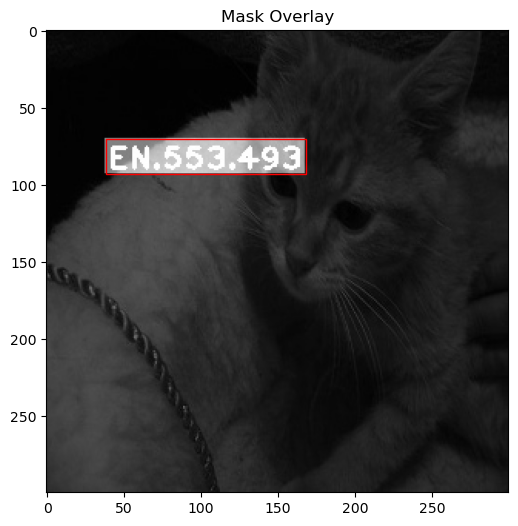

True

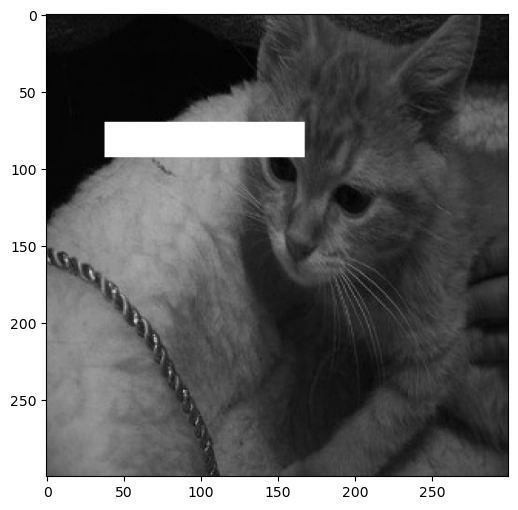

In [72]:
# I should really write a function for this :o
img_path = '/Users/xinmingshen_1/Desktop/test 2/cat.3.jpg'
img = cv2.imread(img_path)

mask = np.zeros(img.shape[:2], dtype=np.uint8)
mask[start_ir[1]:end_ir[1], start_ir[0]:end_ir[0]] = 255

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.imshow(img_rgb)
# ax.imshow(mask, cmap='gray', alpha=0.5) # transparent

rect = patches.Rectangle((start_ir[0], start_ir[1]), end_ir[0] - start_ir[0], end_ir[1] - start_ir[1], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

ax.set_title('Mask Overlay')
plt.show()


img[start_ir[1]:end_ir[1], start_ir[0]:end_ir[0]] = [255, 255, 255] # Modify it to white
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.imshow(img_rgb)

save_path = '/Users/xinmingshen_1/Desktop/Watermark/modified_image_test.jpg'
cv2.imwrite(save_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [74]:
def remove_watermark_and_save_seriously(img_path, save_dir, start_ir, end_ir):
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"Skipping {img_path}, could not load image.")
        return

    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    mask[start_ir[1]:end_ir[1], start_ir[0]:end_ir[0]] = 255

    img[start_ir[1]:end_ir[1], start_ir[0]:end_ir[0]] = [255, 255, 255]

    filename = os.path.basename(img_path) # if I know this function earlier... so much faster
    save_path = os.path.join(save_dir, filename)

    cv2.imwrite(save_path, img)
    print(f"Processed and saved: {save_path}")

In [76]:
img_dir = '/Users/xinmingshen_1/Desktop/test 2'
save_dir = '/Users/xinmingshen_1/Desktop/Watermark'

start_ir = (38, 70)  
end_ir = (168, 93)  

for filename in os.listdir(img_dir):
    if filename.lower().endswith(('.jpg', '.jpeg')):  
        img_path = os.path.join(img_dir, filename)
        remove_watermark_and_save_seriously(img_path, save_dir, start_ir, end_ir)

Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.6.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.30.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.24.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.18.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.19.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.25.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.31.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.7.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.5.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.27.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.33.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.32.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.26.jpg
Processed and saved: /Users/xinmingshen_1/Desktop/Watermark/cat.4.jpg
Processed 